In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [9]:
#超参数
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [10]:
#Traininh Data
train_x = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                    7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                     2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_x.shape[0]

In [11]:
#tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')

#Set model weights
W = tf.Variable(np.random.randn(),name='weight')
b = tf.Variable(np.random.randn(),name= 'bias')

In [12]:
#构造线性模型
pred = tf.add(tf.multiply(X,W),b)

In [17]:
#损失函数
cost = tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)

#梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [19]:
#初始化变量
init = tf.global_variables_initializer()

Epoch: 0050  cost=0.085598990 W= 0.30164087 b= 0.42704254
Epoch: 0100  cost=0.084601171 W= 0.2985453 b= 0.4493113
Epoch: 0150  cost=0.083718717 W= 0.29563388 b= 0.47025597
Epoch: 0200  cost=0.082938395 W= 0.29289564 b= 0.48995432
Epoch: 0250  cost=0.082248375 W= 0.29032043 b= 0.50848085
Epoch: 0300  cost=0.081638165 W= 0.28789806 b= 0.52590674
Epoch: 0350  cost=0.081098601 W= 0.2856199 b= 0.54229575
Epoch: 0400  cost=0.080621511 W= 0.28347722 b= 0.5577097
Epoch: 0450  cost=0.080199607 W= 0.28146195 b= 0.572208
Epoch: 0500  cost=0.079826586 W= 0.27956635 b= 0.58584464
Epoch: 0550  cost=0.079496726 W= 0.2777835 b= 0.5986704
Epoch: 0600  cost=0.079205148 W= 0.27610666 b= 0.61073273
Epoch: 0650  cost=0.078947365 W= 0.27452987 b= 0.62207633
Epoch: 0700  cost=0.078719497 W= 0.27304694 b= 0.6327443
Epoch: 0750  cost=0.078518018 W= 0.27165222 b= 0.64277846
Epoch: 0800  cost=0.078339957 W= 0.2703404 b= 0.65221506
Epoch: 0850  cost=0.078182511 W= 0.2691066 b= 0.6610913
Epoch: 0900  cost=0.078043

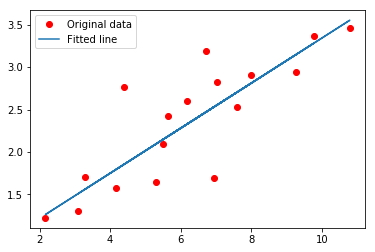

In [29]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict = {X: x,Y: y})
        
        if (epoch+1)%display_step ==0:
            c =sess.run(cost,feed_dict = {X: train_x, Y: train_y})
            print('Epoch: '+'%04d'%(epoch+1),' cost='+'{:.9f}'.format(c),'W= '+str(sess.run(W)),'b= '+str(sess.run(b)))
        
    print('\nOptimization Finished!')
    training_cost = sess.run(cost,feed_dict={X: train_x,Y: train_y})
    print('Training cost = ',training_cost, 'W= '+str(sess.run(W)),'b= '+str(sess.run(b)))
    
    plt.plot(train_x,train_y,'ro',label= 'Original data')
    plt.plot(train_x,sess.run(W)*train_x+sess.run(b),label = 'Fitted line')
    plt.legend()